# Congress Age vs Party Agreeability

### Gabriel Small, Evgenia Anastasakos, Jeffrey Liu, and Zidane Marinez

In [10]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# Importing Data
* Importing data from the 538 datasets for
  > * Congress Age
  > * Congressional Agreement with Trump
  > * Congressional Agreement with Biden
  

## Cleaning Data
* Group By Bioguide
* Add Columns for Trump agreements vs Total
* Add Columns for Biden agreements vs Total
* Remove duplicates, grouping by earliest year joined, and latest age and cmltv congress
* Add Column for ratio of Biden Agreement to Biden Agreement Total and same with Trump

In [52]:
congress_df = pd.read_csv("data_aging_congress.csv")
congress_df = congress_df.rename(columns = {'bioguide_id': 'bioguide'})

trump_agreement = pd.read_csv("vote_predictions.csv")
biden_agreement = pd.read_csv("votes-Table 1.csv")
#count biden agreement by bioguide
#make a dataframe with the count of biden position equaling vote by bioguide#
biden_agreement = biden_agreement.value_counts(['bioguide','biden_position','vote']).sort_index().reset_index(name='biden_count_total')
biden_agreement['biden_agree_counts'] = biden_agreement['biden_count_total'] * (biden_agreement['biden_position'] == biden_agreement['vote'])
#now group by bioguide 
biden_agreement = biden_agreement.groupby('bioguide').agg({'biden_count_total':'sum','biden_agree_counts':'sum'}).reset_index()
# do the same for trump, first changing no and yes to support or oppose
trump_agreement['vote'] = trump_agreement['vote'].replace({'No':'oppose','Yes':'support'})
trump_agreement = trump_agreement.value_counts(['bioguide','trump_position','vote']).sort_index().reset_index(name='trump_count_total')
trump_agreement['trump_agree_counts'] = trump_agreement['trump_count_total'] * (trump_agreement['trump_position'] == trump_agreement['vote'])
trump_agreement = trump_agreement.groupby('bioguide').agg({'trump_count_total':'sum','trump_agree_counts':'sum'}).reset_index()
#combine all of the datasets
congress_df = congress_df.merge(trump_agreement, on='bioguide', how='inner')
congress_df = congress_df.merge(biden_agreement, on='bioguide', how='inner')
congress_df_clean = congress_df.groupby('bioguide').max().reset_index()
congress_df_clean['start_date'] = congress_df.groupby('bioguide').min().reset_index()['start_date']
congress_df_clean['biden_agree_count_ratio'] = congress_df_clean['biden_agree_counts'] / congress_df_clean['biden_count_total']
congress_df_clean['trump_agree_count_ratio'] = congress_df_clean['trump_agree_counts'] / congress_df_clean['trump_count_total']
#for the sake of this, independents are democrats
congress_df_clean['party_code'] = congress_df_clean['party_code'].replace({328: 100})
congress_df_clean   

,bioguide,congress,start_date,chamber,state_abbrev,party_code,bioname,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,trump_count_total,trump_agree_counts,biden_count_total,biden_agree_counts,biden_agree_count_ratio,trump_agree_count_ratio
0,A000055,118,1997-01-03,House,AL,200,"ADERHOLT, Robert",1965-07-22,14,14,20984,57.451061,Gen X,188,177,52,3,0.057692,0.941489
1,A000148,118,2021-01-03,House,MA,100,"AUCHINCLOSS, Jake",1988-01-29,2,2,12758,34.929500,Millennial,3,0,51,49,0.960784,0.000000
2,A000369,118,2011-01-03,House,NV,200,"AMODEI, Mark E.",1958-06-12,7,7,23581,64.561259,Boomers,188,172,54,3,0.055556,0.914894
3,A000370,118,2013-01-03,House,NC,100,"ADAMS, Alma",1946-05-27,6,6,27980,76.605065,Boomers,188,21,54,52,0.962963,0.111702
4,A000371,118,2015-01-03,House,CA,100,"AGUILAR, Peter Rey",1979-06-19,5,5,15904,43.542779,Gen X,188,32,54,52,0.962963,0.170213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,W000823,118,2019-01-03,House,FL,200,"WALTZ, Michael",1974-01-31,3,3,17869,48.922656,Gen X,92,77,52,2,0.038462,0.836957
434,W000825,118,2019-01-03,House,VA,100,"WEXTON, Jennifer",1968-05-27,3,3,19944,54.603696,Gen X,92,6,49,49,1.000000,0.065217
435,W000826,118,2017-01-03,House,PA,100,"WILD, Susan",1957-06-07,4,4,23951,65.574264,Boomers,95,9,53,49,0.924528,0.094737
436,Y000064,118,2011-01-03,Senate,IN,200,"YOUNG, Todd",1972-08-24,7,4,18394,50.360027,Gen X,129,106,144,41,0.284722,0.821705


# Analysis of Data
* Summary of Data
* Correlation Matrix
* Graph Relation of Age to Agreement with Trump
* Graph Relation of Age to Agreement with Biden
* Graph Relation of Agreement with Trump to Agreement with Biden
* Graph Relation of Party with Agreement
* Graph Cumulitive Congresses
* 

In [53]:
congress_df_clean.describe()
congress_df_clean.corr(numeric_only=True)
#based on this, i can see that cmltv_chamber and age have low correlations so i can use them both as  features
#i can also see that party code shares an expected correlation with president agreement



,congress,party_code,cmltv_cong,cmltv_chamber,age_days,age_years,trump_count_total,trump_agree_counts,biden_count_total,biden_agree_counts,biden_agree_count_ratio,trump_agree_count_ratio
congress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party_code,NaN,1.000000,-0.208785,-0.206064,-0.101777,-0.101777,-0.177476,0.677929,-0.018238,-0.732673,-0.984690,0.940814
cmltv_cong,NaN,-0.208785,1.000000,0.958774,0.595022,0.595022,0.484854,0.118687,0.254647,0.327092,0.251159,-0.144905
cmltv_chamber,NaN,-0.206064,0.958774,1.000000,0.595086,0.595086,0.539681,0.138341,0.108429,0.229253,0.238126,-0.149427
age_days,NaN,-0.101777,0.595022,0.595086,1.000000,1.000000,0.327551,0.089185,0.188560,0.193026,0.133999,-0.046424
age_years,NaN,-0.101777,0.595022,0.595086,1.000000,1.000000,0.327551,0.089185,0.188560,0.193026,0.133999,-0.046424
trump_count_total,NaN,-0.177476,0.484854,0.539681,0.327551,0.327551,1.000000,0.493392,-0.110824,0.060942,0.181027,-0.076505
trump_agree_counts,NaN,0.677929,0.118687,0.138341,0.089185,0.089185,0.493392,1.000000,-0.015324,-0.472027,-0.669976,0.728733
biden_count_total,NaN,-0.018238,0.254647,0.108429,0.188560,0.188560,-0.110824,-0.015324,1.000000,0.592963,0.102890,0.033228
biden_agree_counts,NaN,-0.732673,0.327092,0.229253,0.193026,0.193026,0.060942,-0.472027,0.592963,1.000000,0.778838,-0.637471


In [54]:
#I will split data by party as it is easier to analyze data when using party as a control variable.
republican_df = congress_df_clean[congress_df_clean['party_code'] == 200]
print(republican_df)
democrat_df = congress_df_clean[congress_df_clean['party_code'] == 100]
print(democrat_df)


    bioguide  congress  start_date chamber state_abbrev  party_code  \
0    A000055       118  1997-01-03   House           AL         200   
2    A000369       118  2011-01-03   House           NV         200   
5    A000372       118  2015-01-03   House           GA         200   
6    A000375       118  2017-01-03   House           TX         200   
8    A000377       118  2019-01-03   House           ND         200   
..       ...       ...         ...     ...          ...         ...   
429  W000816       118  2013-01-03   House           TX         200   
431  W000821       118  2015-01-03   House           AR         200   
433  W000823       118  2019-01-03   House           FL         200   
436  Y000064       118  2011-01-03  Senate           IN         200   
437  Z000018       118  2015-01-03   House           MT         200   

                     bioname    birthday  cmltv_cong  cmltv_chamber  age_days  \
0           ADERHOLT, Robert  1965-07-22          14             1

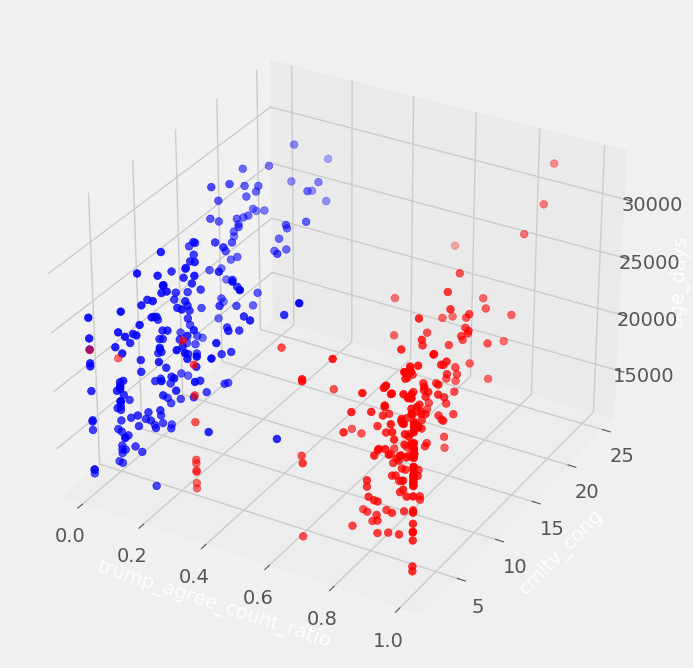

In [55]:
fig = plots.figure(figsize = (12,8))
ax = plots.axes(projection='3d')


ax.scatter3D(congress_df_clean.loc[congress_df_clean['party_code']== 200]['trump_agree_count_ratio'], congress_df_clean.loc[congress_df_clean['party_code']== 200]['cmltv_cong'], congress_df_clean.loc[congress_df_clean['party_code']== 200]['age_days'] , color='red', s=30)
ax.scatter3D(congress_df_clean.loc[congress_df_clean['party_code']== 100]['trump_agree_count_ratio'], congress_df_clean.loc[congress_df_clean['party_code']== 100]['cmltv_cong'], congress_df_clean.loc[congress_df_clean['party_code']== 100]['age_days'] , color='blue', s=30)


ax.set_xlabel('trump_agree_count_ratio')
ax.set_ylabel('cmltv_cong')
ax.set_zlabel('age_days');

#This shows that a classification by agree count would ber fairly easy to do. 

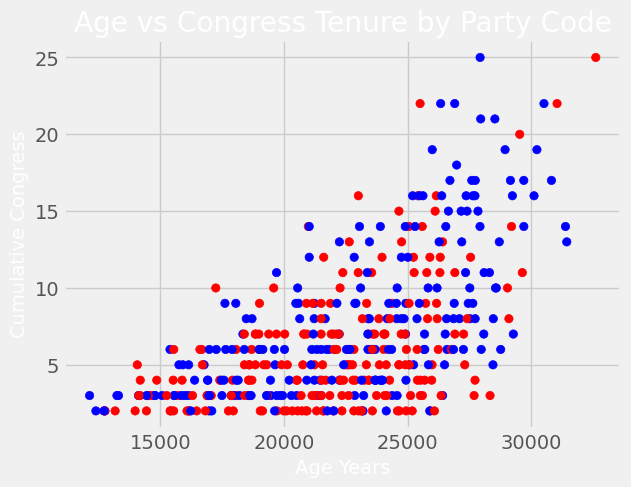

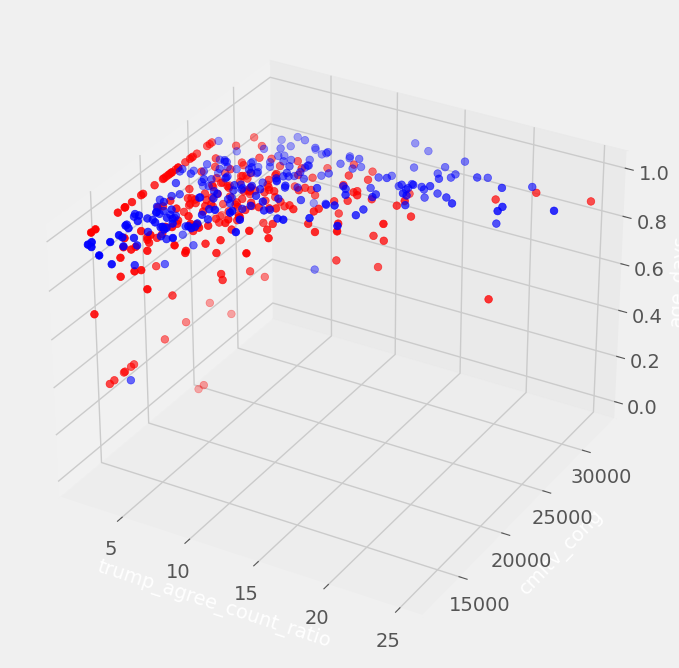

In [64]:
# code here and in additional cells if needed

plots.scatter( congress_df_clean['age_days'],congress_df_clean['cmltv_cong'], c=congress_df_clean['party_code'], cmap='bwr')
#use red and blue colors to represent party code
plots.ylabel('Cumulative Congress')
plots.xlabel('Age Years')
plots.title('Age vs Congress Tenure by Party Code')
plots.show()
# No party seems to have a clear advantage in terms of age and cmltv_cong

#see biden and trump decision based on age and tenure
fig = plots.figure(figsize = (12,8))
ax = plots.axes(projection='3d')


ax.scatter3D( democrat_df['cmltv_cong'], democrat_df['age_days'] ,democrat_df['biden_agree_count_ratio'], color='blue', s=30)
ax.scatter3D( republican_df['cmltv_cong'], republican_df['age_days'] ,republican_df['trump_agree_count_ratio'], color='red', s=30)


ax.set_xlabel('trump_agree_count_ratio')
ax.set_ylabel('cmltv_cong')
ax.set_zlabel('age_days');

#This shows that a classification by agree count would ber fairly easy to do. 